# Análisis Entrópico

En esta notebook, veremos algunas estadísticas relacionadas a la entropía.

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import re

df = pd.read_csv("../output/provinces_words.csv", index_col=0)

cant_palabras = [c for c in df.columns if re.match(r'.*ocurrencias$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*usuarios$', c)]

print("columnas de palabras => {}\n".format(cant_palabras))
print("columnas de usuarios => {}".format(cant_personas))

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["cant_palabra"] = df[cant_palabras].sum(axis=1)
df["cant_usuarios"] = df[cant_personas].sum(axis=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
columnas de palabras => ['buenosaires_ocurrencias', 'catamarca_ocurrencias', 'chaco_ocurrencias', 'chubut_ocurrencias', 'cordoba_ocurrencias', 'corrientes_ocurrencias', 'entrerios_ocurrencias', 'formosa_ocurrencias', 'jujuy_ocurrencias', 'lapampa_ocurrencias', 'larioja_ocurrencias', 'mendoza_ocurrencias', 'misiones_ocurrencias', 'neuquen_ocurrencias', 'rionegro_ocurrencias', 'salta_ocurrencias', 'sanjuan_ocurrencias', 'sanluis_ocurrencias', 'santacruz_ocurrencias', 'santafe_ocurrencias', 'santiago_ocurrencias', 'tierradelfuego_ocurrencias', 'tucuman_ocurrencias']

columnas de usuarios => ['buenosaires_usuarios', 'catamarca_usuarios', 'chaco_usuarios', 'chubut_usuarios', 'cordoba_usuarios', 'corrientes_usuarios', 'entrerios_usuarios', 'formosa_usuarios', 'jujuy_usuarios', 'lapampa_usuarios', 'larioja_usuarios', 'mendoza_usuarios', 'misiones_usuarios', 'neuquen_usuarios', 'rionegro_usuarios', 'salta_u

In [5]:
import numpy as np
from contrastes.information_value import simulated_shuffled_entropy_multinomial
np.random.seed(seed=1)

fn = lambda ws: simulated_shuffled_entropy_multinomial(int(ws), len(cant_palabras))

df["sh_entropy_palabras"] = df.cant_palabra.apply(fn)
df["sh_entropy_personas"] = df.cant_usuarios.apply(fn)

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

df["delta_palabras"] = df["sh_entropy_palabras"] - df["entropy_palabras"]
df["delta_personas"] = df["sh_entropy_personas"] - df["entropy_personas"]

df["log_cantidad"] = np.log2(df.cant_palabra)
df["log_personas"] = np.log2(df.cant_usuarios)

df["norm_cantidad"] = df["log_cantidad"] / df["log_cantidad"].max() 
df["norm_personas"] = df["log_personas"] / df["log_personas"].max()

df["ival_palabras"] = df.norm_cantidad * df.delta_palabras
df["ival_personas"] = df.norm_personas * df.delta_personas
df["ival"] = df["ival_palabras"] * df["ival_personas"]

df_personas = df.sort_values("ival_personas", ascending=False)
df_palabras = df.sort_values("ival_palabras", ascending=False)
df_pp = df.sort_values("ival", ascending=False)

## Plot "3d" usuarios, ocurrencias -> entropía

Acá vemos cuáles son las palabras que queremos encontrar: las que están en "rojo", aunque con cierto nivel de uso...

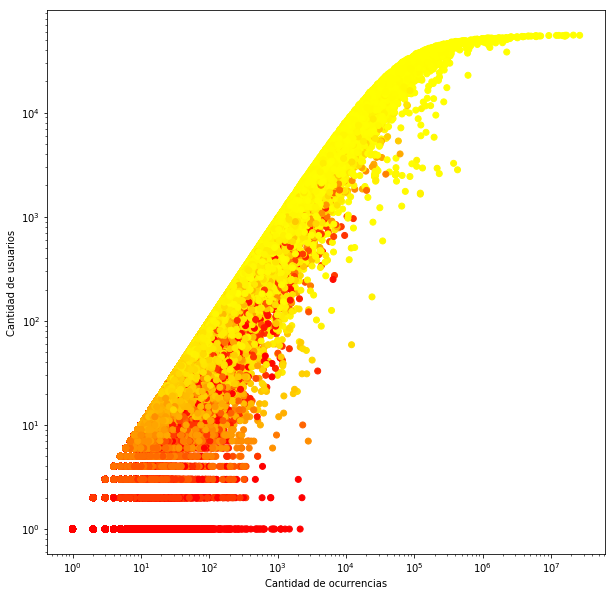

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

plt.scatter(df["cant_palabra"], df["cant_usuarios"], 
        c=df["entropy_personas"], cmap=plt.cm.autumn)
plt.xlabel("Cantidad de ocurrencias")
plt.ylabel("Cantidad de usuarios")
plt.semilogx();
plt.semilogy();